In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


## Exploring Data

In [3]:
suicide = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
suicide.shape

(27820, 12)

In [6]:
suicide.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Preprocessing variables

In [7]:
suicide.rename(columns = {suicide.columns.values[9]: 'gdp', suicide.columns.values[10]: 'gdp_per_capita'}, inplace = True)

In [8]:
suicide['gdp'].replace(',', '', regex = True, inplace = True)

In [9]:
suicide['gdp'] = pd.to_numeric(suicide['gdp'])

In [10]:
suicide['suicides_no'] = suicide['suicides_no'].astype(float)
suicide['suicides/100k pop'] = suicide['suicides/100k pop'].astype(float)

In [11]:
suicide['gdp'] = suicide['gdp_per_capita'].astype(float)

# Analyzing Data

<AxesSubplot:>

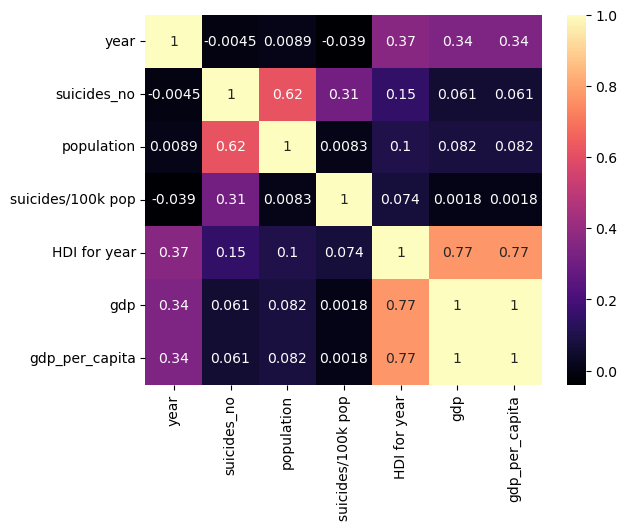

In [12]:
sns.heatmap(data = suicide.corr(),cmap = 'magma', annot = True)

In [13]:
suicide_country = suicide.groupby('country').agg({'suicides_no': "sum"}).reset_index().sort_values('suicides_no', ascending = False)
suicide_country

,country,suicides_no
75,Russian Federation,1209742.0
98,United States,1034013.0
46,Japan,806902.0
33,France,329127.0
95,Ukraine,319950.0
...,...,...
55,Maldives,20.0
1,Antigua and Barbuda,11.0
79,San Marino,4.0
76,Saint Kitts and Nevis,0.0


In [14]:
suicide_country_100k = suicide.groupby('country').agg({'suicides/100k pop': "sum"}).reset_index().sort_values('suicides/100k pop', ascending = False)
suicide_country_100k.head()

,country,suicides/100k pop
75,Russian Federation,11305.13
52,Lithuania,10588.88
40,Hungary,10156.07
47,Kazakhstan,9519.52
73,Republic of Korea,9350.45


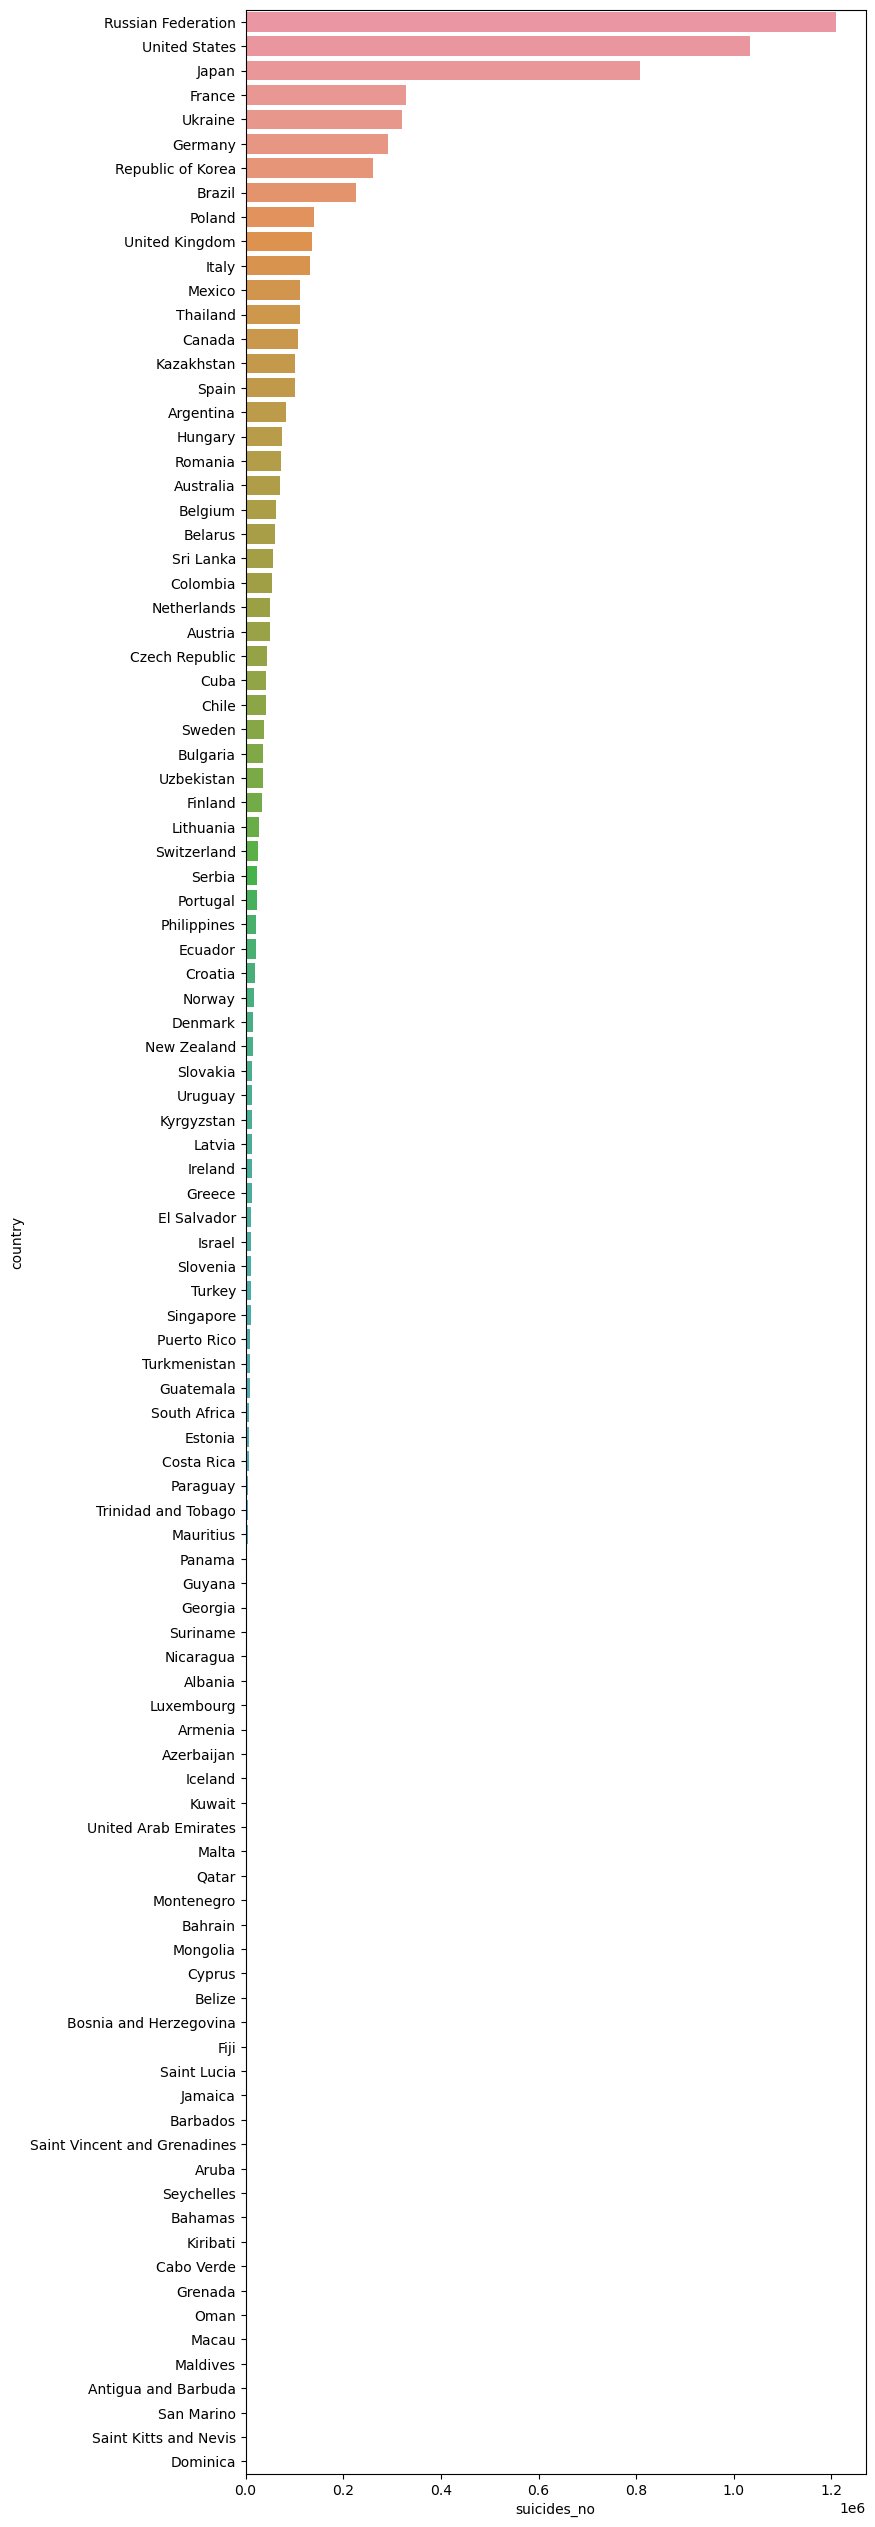

In [15]:
plt.figure(figsize=(8,32))
sns.barplot(data = suicide_country,x = suicide_country["suicides_no"], y = suicide_country['country'], orient='horizonal', dodge=True)
plt.show()

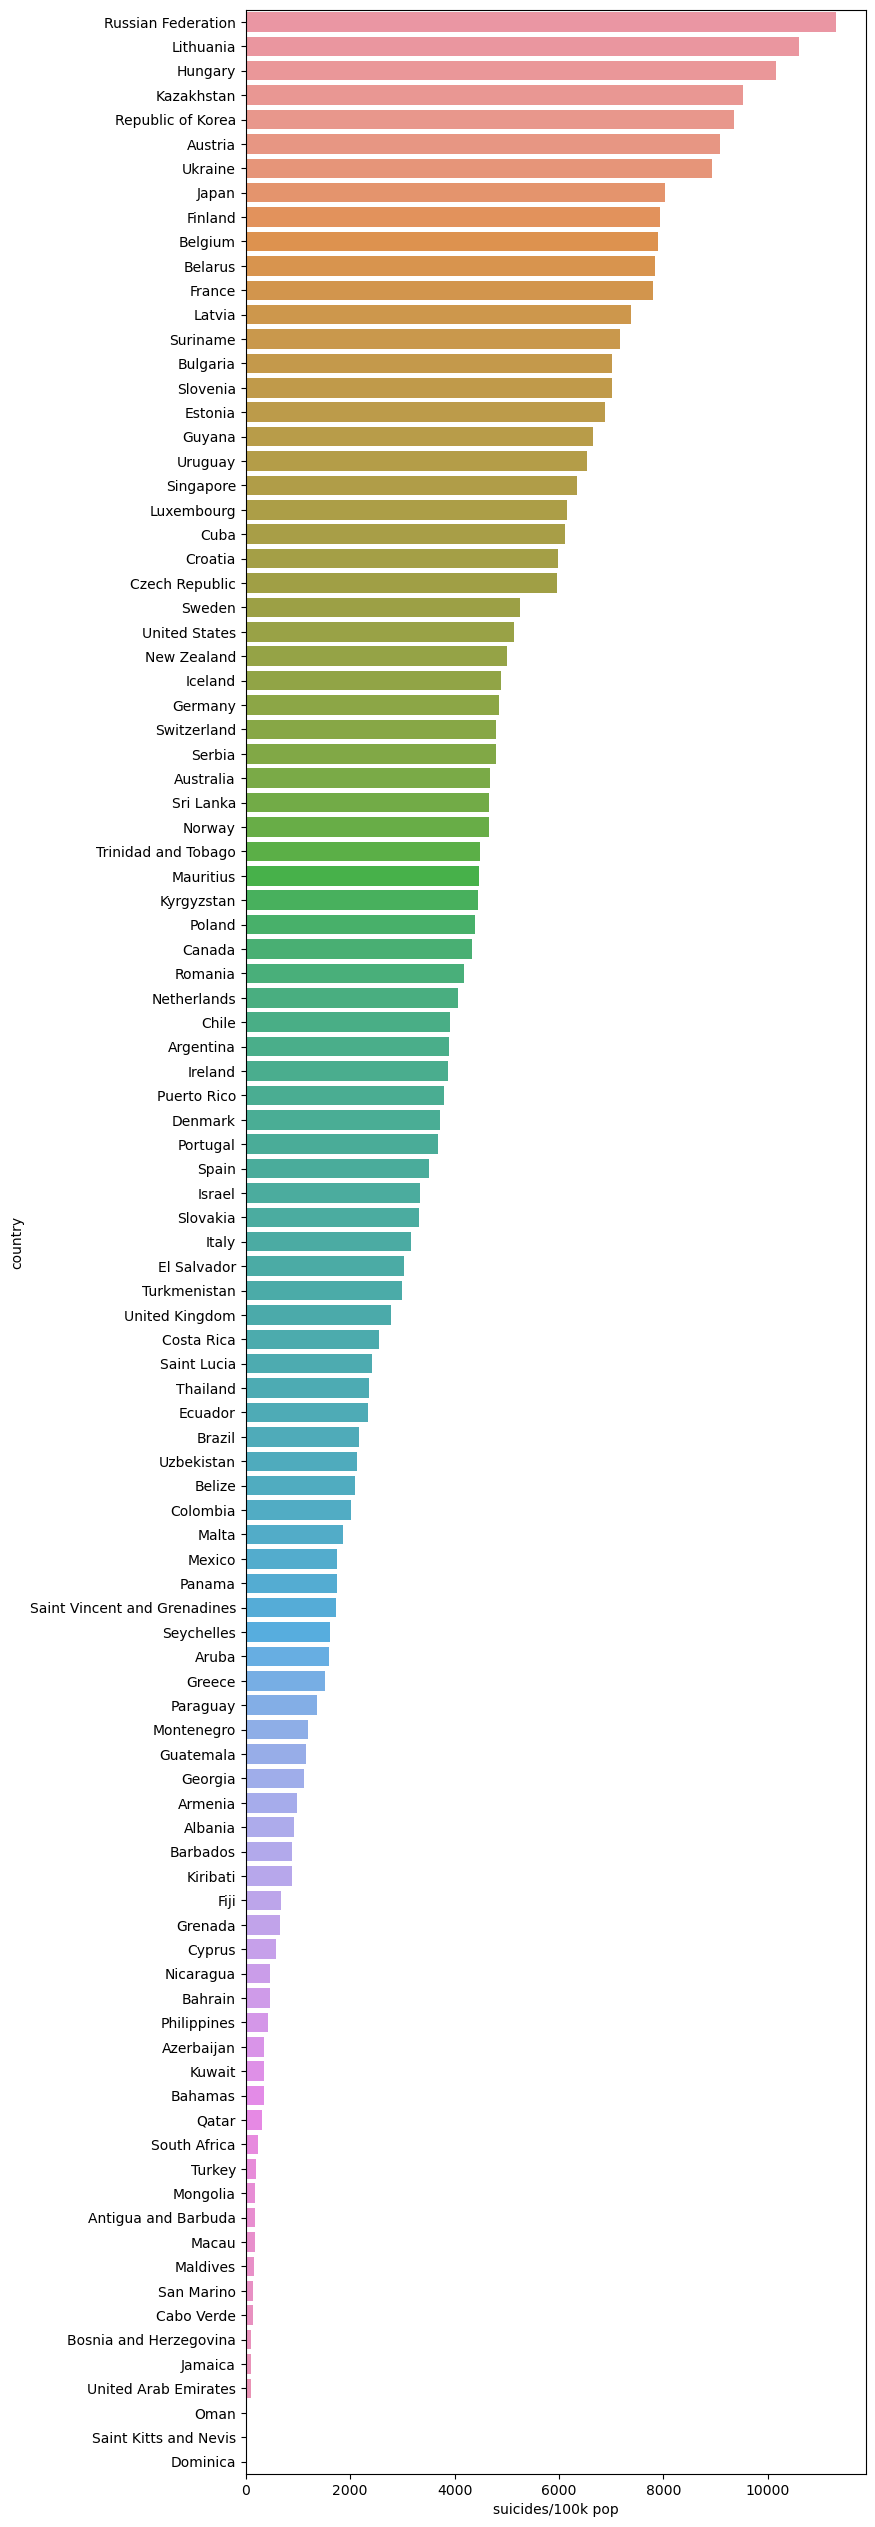

In [16]:
plt.figure(figsize=(8,32))
sns.barplot(data = suicide_country_100k,x = suicide_country_100k["suicides/100k pop"], y = suicide_country_100k['country'], orient='horizonal', dodge=True)
plt.show()

In [38]:
suicide_country_over_time = suicide.groupby(['country', 'year'])['suicides_no'].sum().reset_index()
suicide_country_over_time = suicide_country_over_time[suicide_country_over_time['country'].isin(suicide_country['country'].head())]
suicide_country_over_time

,country,year,suicides_no
758,France,1985,12501.0
759,France,1986,12529.0
760,France,1987,12161.0
761,France,1988,11599.0
762,France,1989,11715.0
...,...,...,...
2266,United States,2011,39508.0
2267,United States,2012,40596.0
2268,United States,2013,41143.0
2269,United States,2014,42769.0


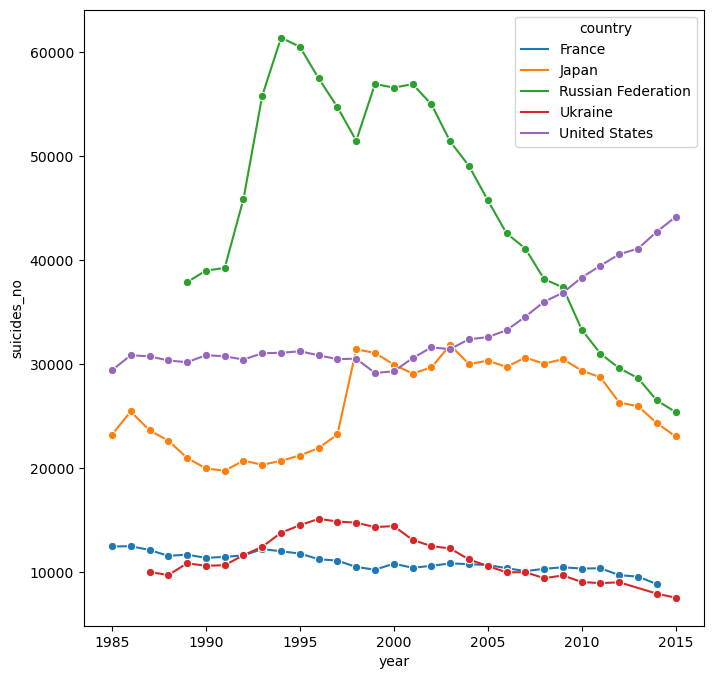

In [42]:
plt.figure(figsize=(8,8))
sns.lineplot(data = suicide_country_over_time, x = 'year', y = 'suicides_no', hue = 'country', marker = 'o')
plt.show()

In [17]:
df_male = suicide[suicide['sex'] == 'male'].groupby('year')[['suicides_no',"suicides/100k pop"]].sum().reset_index()
df_female = suicide[suicide['sex'] == 'female'].groupby('year')[['suicides_no', 'suicides/100k pop']].sum().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  after removing the cwd from sys.path.


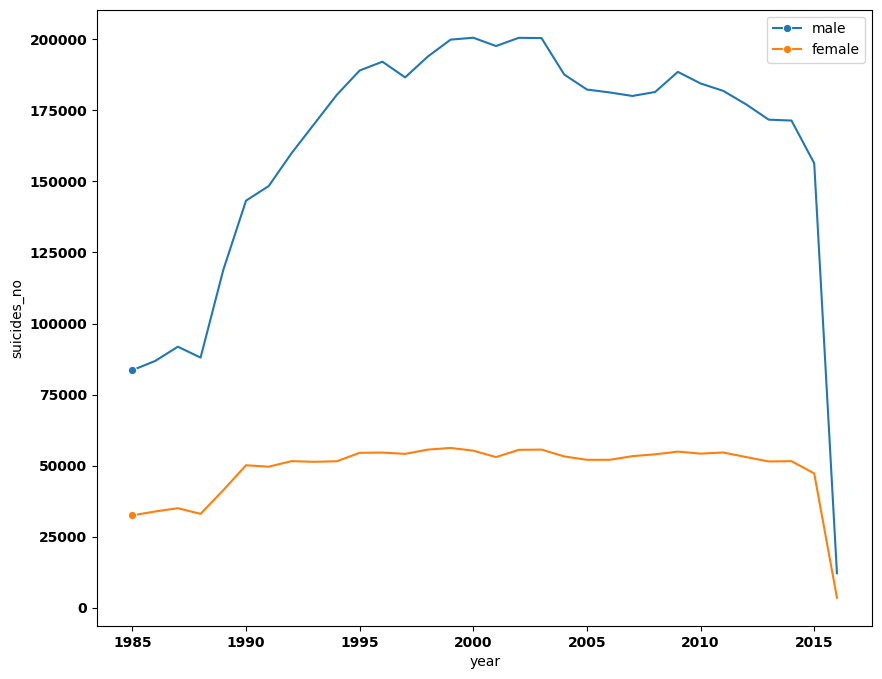

In [44]:
max = df_male['suicides_no'].max()
plt.figure(figsize=(10,8))
sns.lineplot(data = df_male, x = 'year', y = 'suicides_no', ci = None, marker = 'o', markevery = max)
sns.lineplot(data = df_female, x = 'year', y = 'suicides_no', ci = None, marker = 'o', markevery = max)
plt.legend(['male', 'female'])
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  This is separate from the ipykernel package so we can avoid doing imports until


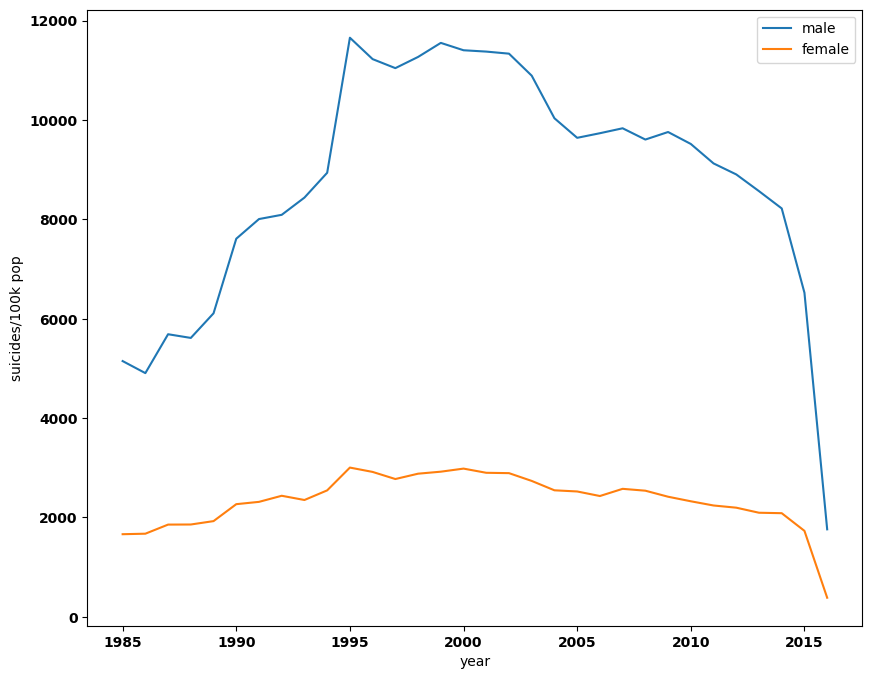

In [45]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df_male, x = 'year', y = 'suicides/100k pop', ci = None)
sns.lineplot(data = df_female, x = 'year', y = 'suicides/100k pop', ci = None)
plt.legend(['male', 'female'])
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

In [20]:
suicide_rates_gender_age = suicide.groupby(['sex',"age"])['suicides_no'].sum().reset_index().sort_values('age')
suicide_rates_gender_100k_age = suicide.groupby(['sex','age'])['suicides/100k pop'].sum().reset_index().sort_values('age')

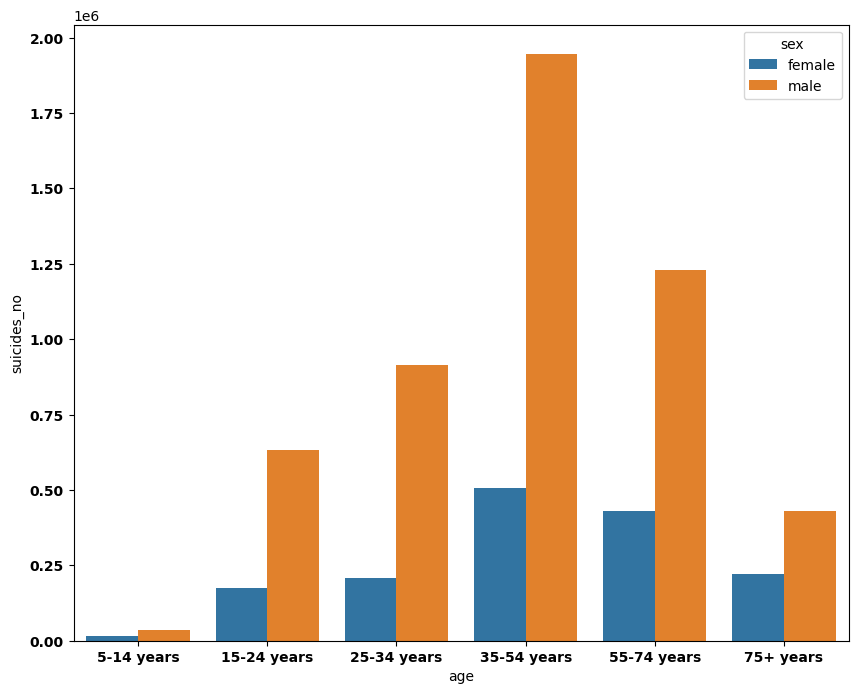

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(data = suicide_rates_gender_age, x = 'age', y = 'suicides_no', hue = 'sex',
            order = ['5-14 years', '15-24 years','25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

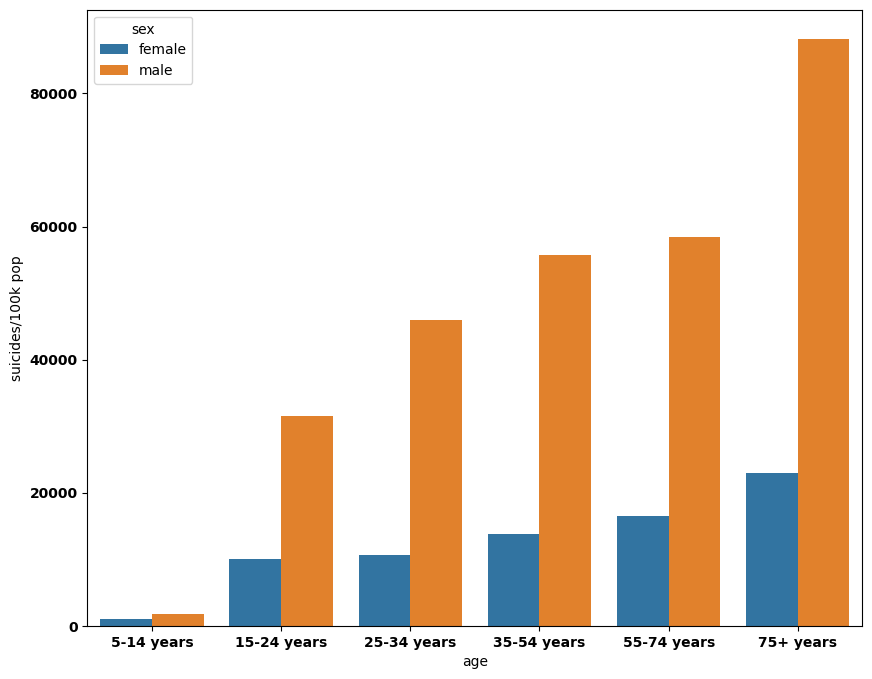

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(data = suicide_rates_gender_100k_age, x = 'age', y = 'suicides/100k pop', hue = 'sex',
            order = ['5-14 years', '15-24 years','25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()